$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cA {\mathcal{A}}$
$\def \cD {\mathcal{D}}$
$\def \cM {\mathcal{M}}$
$\def \cN {\mathcal{N}}$
$\def \cW {\mathcal{W}}$
$\def \bc {\mathbf{c}}$
$\def \bu {\mathbf{u}}$
$\def \bv {\mathbf{v}}$
$\def \bw {\mathbf{w}}$
$\def \bG {\mathbf{G}}$
$\def \bC {\mathbf{C}}$
$\def \bD {\mathbf{D}}$
$\def \bI {\mathbf{I}}$
$\def \bP {\mathbf{P}}$
$\def \bQ {\mathbf{Q}}$
$\def \bR {\mathbf{R}}$
$\def \bS {\mathbf{S}}$
$\def \bT {\mathbf{T}}$
$\def \bU {\mathbf{U}}$
$\def \bV {\mathbf{V}}$
$\def \bW {\mathbf{W}}$
$\def \bPhi {\mathbf{\Phi}}$
$\def \bPsi {\mathbf{\Psi}}$
$\def \bGamma {\mathbf{\Gamma}}$
$\def \bSigma {\mathbf{\Sigma}}$
$\def \bTheta {\mathbf{\Theta}}$
$\def \bOmega {\mathbf{\Omega}}$
$\def \bbE {\mathbb{E}}$
$\def \bbP {\mathbb{P}}$
$\def \bbR {\mathbb{R}}$
$\def \bbN {\mathbb{N}}$

### When $\sigma_i = 0$ for $n< i \le K$, then what does our pseudo-inverse approach yield?

Again all tests are in $\bbR^K$, and we have two random orthonormal bases and $(\psi_1,\ldots,\psi_K)$ and $(\varphi_1,\ldots,\varphi_K)$, along with the singular values / PCA values of $(\sigma_1,\ldots,\sigma_n,0,\ldots)$, i.e. we assume the PCA comes up short with only $n$ dimensions (or that they are so small they should be truncated, which helps for stability of the final systems).

We assume further that the measurement space $W = \mathrm{span}(\psi_1,\ldots,\psi_m)$ and $W_\perp = \mathrm{span}(\psi_{m+1},\ldots,\psi_K)$, and we write $V = \mathrm{span}(\varphi_1,\ldots,\varphi_n)$.

We have the matrix $\bPhi = [\varphi_1 \ldots \varphi_K]$ and $\bPsi = [\psi_1\,\ldots\,\psi_K]$, where the basis vectors are the columns of the matrices. Finally we write $\bW = [\psi_1\,\ldots\,\psi_m]$, $\bW_\perp = [\psi_{m+1}\,\ldots\,\psi_K]$ and $\bV = [\varphi_{1}\,\ldots\,\varphi_n]$. For the cross-Grammian we have $\bG = \bPhi^T \bPsi$.

Now, $\bT = \bG^T \bD^{-1} \bG = \bPsi^T \bPhi \bSigma^{-2} \bPhi^T \bPsi$, the diagonal matrix $\bSigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_n,0\ldots)$. Note also that, using the above notation $\bPsi = \begin{bmatrix} \bW & \bW_\perp \end{bmatrix}$, so in fact

$$ \bG = \bPhi^T \bPsi = \begin{bmatrix} \bPhi^T\bW & \bPhi^T\bW_\perp \end{bmatrix} $$

$$\bS = 
\begin{bmatrix}
\bW^T\bPhi \\
\bW_\perp^T\bPhi
\end{bmatrix}
\bSigma^{2} 
\begin{bmatrix} \bPhi^T \bW & \bPhi^T \bW_\perp \end{bmatrix}
=
\begin{bmatrix}
\bW^T \bPhi \bSigma^{2} \bPhi^T \bW & \bW^T \bPhi \bSigma^{2} \bPhi^T \bW_\perp \\
\bW_\perp^T \bPhi \bSigma^{2} \bPhi^T \bW & \bW_\perp^T \bPhi \bSigma^{2} \bPhi^T \bW_\perp
\end{bmatrix} $$
and similar for $\bT$ (except with $\bSigma^{-2}$).

which give us the expressions for $\bS_{1,1}$, $\bT_{1,1}$, $\bT_{1,2}$ etc.. The issue here is that $\bS_{1,1}$ or $\bT_{2,2}$ may no longer invertible as 

$$\bS_{1,1} = \bW^T \bPhi \bSigma^{2} \bPhi^T \bW =\bW^T \bV \bSigma_n^{2} \bV^T \bW$$

$$\bT_{2,2} = \bW_\perp^T \bPhi \bSigma^{-2} \bPhi^T \bW_\perp =\bW_\perp^T \bV \bSigma_n^{-2} \bV^T \bW_\perp$$

which are both of rank at most $n$. 

In [297]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Latex, display

import sys
sys.path.append("../../")
import pyApproxTools as pat

%matplotlib inline
np.random.seed(1)

In [343]:
K = 100  # The dimensionality of the ambient space (can be up to 2^16 for FEM solutions)
n = K    # The truncation dimension of the PCA / embedding dimension of the manifold 
m = 6    # The dimension off the measurement space

# First make two random orthonormal vector bases
Phi = sp.stats.ortho_group.rvs(dim=K) # The "PCA" space
Psi = sp.stats.ortho_group.rvs(dim=K) # The "measurement" space

sigma = np.sort(np.random.random(n))[::-1]
sigma[n:] = 0
Sigma = np.pad(np.diag(sigma), ((0,K-n),(0,K-n)), 'constant')
Sigma_inv = np.pad(np.diag(1.0/sigma), ((0,K-n),(0,K-n)), 'constant')
Sigma_n = np.diag(sigma)
Sigma_n_inv = np.diag(1.0/sigma)

V = Phi[:,:n]
W = Psi[:,:m]
W_p = Psi[:,m:]

T = Psi.T @ Phi @ Sigma_inv @ Sigma_inv @ Phi.T @ Psi
S = Psi.T @ Phi @ Sigma @ Sigma @ Phi.T @ Psi

### First test (which appears to pass)
Checking that $\bS_{1,1} = \bW^T \bPhi \bSigma^{2} \bPhi^T \bW =\bW^T \bV \bSigma_n^{2} \bV^T \bW$

and $\bT_{2,2} = \bW_\perp^T \bPhi \bSigma^{-2} \bPhi^T \bW_\perp =\bW_\perp^T \bV \bSigma_n^{-2} \bV^T \bW_\perp$, etc...

In [344]:
T21 = T[m:, :m]
T22 = T[m:, m:]
S11 = S[:m, :m]
S21 = S[m:, :m]
S22 = S[m:, m:]

T22_alt = W_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W_p
T21_alt = W_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W
S11_alt = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
S22_alt = W_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W_p
S21_alt = W_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W

print('T_21 of shape {0}, rank {1}, condition {2}'.format(T21.shape, np.linalg.matrix_rank(T21), np.linalg.cond(T21)))
print('T_22 of shape {0}, rank {1}, condition {2}\n'.format(T22.shape, np.linalg.matrix_rank(T22), np.linalg.cond(T22)))
print('S_11 of shape {0}, rank {1}, condition {2}'.format(S11.shape, np.linalg.matrix_rank(S11), np.linalg.cond(S11)))
print('S_21 of shape {0}, rank {1}, condition {2}'.format(S21.shape, np.linalg.matrix_rank(S21), np.linalg.cond(S21)))
print('S_22 of shape {0}, rank {1}, condition {2}\n'.format(S22.shape, np.linalg.matrix_rank(S22), np.linalg.cond(S22)))

# Just to check
display(Latex(r'$\left\| \bT_{{2,1}} - \bW_\perp^T \bV \bSigma^{{-2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(T21 - T21_alt))))
display(Latex(r'$\left\| \bS_{{1,1}} - \bW^T \bV \bSigma^{{2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(S11 - S11_alt))))
display(Latex(r'$\left\| \bS_{{2,1}} - \bW_\perp^T \bV \bSigma^{{2}} \bV^T \bW \right\|_F \
=$ {0}'.format(np.linalg.norm(S21 - S21_alt))))

T_21 of shape (94, 6), rank 6, condition 3135.4408171859777
T_22 of shape (94, 94), rank 94, condition 471449.2501597384

S_11 of shape (6, 6), rank 6, condition 1.8057274284568374
S_21 of shape (94, 6), rank 6, condition 1.4586576580194839
S_22 of shape (94, 94), rank 94, condition 788.252790659712



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Right away above we see several advantages of using $\bS_{1,1}$ to solve the system - the condition number is better in the case of full rank, and the system is only $m\times m$ in size.

### Double checking SVD decompositions and psuedo-inverses

Because both $\bS_{1,1}$ and $\bT_{2,2}$ can be rank difficient if $n < m$ or $n < K-m$ respectively, so we need the pseudo-inverse, $\bS_{1,1}^\dagger$, to solve this system. Let us consider the SVD decomposition of 

$$(\bW^T \bV \bSigma_n) = \bP \bQ \bR \quad\text{giving us}\quad \bS_{1,1} = \bP \bQ \bQ^T \bP^T$$

As is usual, there is a stable inverse for $\bS_{1,1}$ in the span of the columns of $\bP$ up til at most $\min(n, m)$. Let us write that $\bP_{1:r}$ is the matrix made up of the first $r=\min(m,n)$ columns of $\bP$. Psuedo inverse would obv be of the form (assuming, e.g. that the rank of $\bS_{1,1}$ is $n$, and also writing $\bQ^{-2}$ for the appropriate diagonal matrix)

$$\bS^\dagger_{1,1} = \bP_{1:r} \bQ^{-2} (\bP_{1:r})^T$$

Similar calc applies for $\bT_{2,2}$, with the psuedo-inverse applying in the span of the SVD decomp of $(\bW^T \bV \bSigma_n^{-1})$, $\bP_\perp$ up til the $\min(K-m, n)$-th column.

In [345]:
P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n_inv)

rm = min(m,n)
rk = min(K-m, n)

T22_pinv = P_p[:,:rk] @ np.diag(1.0/(Q_p*Q_p)) @ P_p[:,:rk].T
S11_pinv = P[:,:rm] @ np.diag(1/(Q*Q)) @ P[:,:rm].T

display(Latex(r'$\left \| \bS_{{1,1}}^\dagger - \bP_{{1:n}} \bQ^{{-2}} (\bP_{{1:n}})^T \right\|_F =$  {0}'.format(np.linalg.norm(S11_pinv - np.linalg.pinv(S11)))))
display(Latex(r'$\left \| \bT_{{2,2}}^\dagger - \bP_{{\perp,1:n}} \bQ_\perp^{{-2}} (\bP_{{\perp,1:n}})^T \right\|_F =$  {0}'.format(np.linalg.norm(T22_pinv - np.linalg.pinv(T22)))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Given the SVD decompositions

$$ (\bW^T \bV \bSigma_n) = \bP \bQ \bR \quad\text{and}\quad(\bW_\perp^T \bV \bSigma_n) = \bP_\perp \bQ_\perp \bR_\perp $$

we find that (again with $r=\min(m,n)$)

\begin{align}
\bS_{2,1} \bS_{1,1}^\dagger 
&= \bP_\perp \bQ_\perp^{-1} \bR_\perp^T \bR \bQ \bP^T 
\bP_{1:r} \bQ^{-2} (\bP_{1:r})^T \\
&= \bP_\perp \bQ_\perp^{-1} \bR_\perp^T \bR_{1:r} \bQ^{-1} (\bP_{1:r})^T \\
\end{align}

$$ \bw_\perp^* = \bS_{2,1} \bS_{1,1}^\dagger \bw = \bT_{2,2}^\dagger \bT_{2,1} \bw $$

And once again there is a very similar calculation for $\bT_{2,2}^\dagger$.

In [346]:
ra = min(K-m, n)
rm = min(m, n)

P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n)
Ssolver_alt = P_p[:,:ra] @ np.diag(Q_p) @ R_pT[:ra] @ RT[:rm].T @ np.diag(1.0/Q) @ P[:,:rm].T
Ssolver = S21 @ np.linalg.pinv(S11)

print('(S21 * S11_inv) shape {0} condition {1}'.format(Ssolver.shape, np.linalg.cond(Ssolver)))
display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger - (\bP_\perp)_{{1:n}} \bQ_\perp \bR_\perp^T \bR_W \bQ_W^{{-1}} (\bP_W)_{{1:n}}^T \right\|_F =$\
{0}'.format(np.linalg.norm(Ssolver - Ssolver_alt))))

P, Q, RT = sp.linalg.svd(W.T @ V @ Sigma_n_inv)
P_p, Q_p, R_pT = sp.linalg.svd(W_p.T @ V @ Sigma_n_inv)
Tsolver_alt = P_p[:,:ra] @ np.diag(1.0/Q_p) @ R_pT[:ra] @ RT[:rm].T @ np.diag(Q) @ P[:,:rm].T
Tsolver = np.linalg.pinv(T22) @ T21

print('(T22_inv * T21) shape {0} condition {1}'.format(Tsolver.shape, np.linalg.cond(Tsolver)))
display(Latex(r'$\left\| \bT_{{2,2}}^\dagger \bT_{{2,1}} - (\bP_\perp)_{{1:n}} \bQ_\perp^{{-1}} \bR_\perp^T \bR_W \bQ_W (\bP_W)_{{1:n}}^T \right\|_F =$\
{0}'.format(np.linalg.norm(Tsolver - Tsolver_alt))))

display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger  - \bT_{{2,2}}^\dagger \bT_{{2,1}} \right\|_F =$ {0}'.format(np.linalg.norm(Tsolver - Ssolver))))


(S21 * S11_inv) shape (94, 6) condition 1.5016431621644102


<IPython.core.display.Latex object>

(T22_inv * T21) shape (94, 6) condition 1.5016431621668904


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [347]:
print('That other thing Ive been semi hopeful for : {0}'.format(np.linalg.norm(Ssolver - Q.T @ P[:,:n].T)))

That other thing Ive been semi hopeful for : 2271.5961945967997


### So what are we actually getting to here? 

Well, the complexity of the SVD for really large $K$ is just stupendous. We want to consider maybe something like restrict $\bbR^K$ to $\bbR^{2m}$ spanned by $\psi_1,\ldots,\psi_{2m}$ to do this reconstruction, and we know that we'll have it within some amount...

In this case we simply have the "approximate" operators 

$$ \bT_{2,2}^{(\mathrm{app})} = (\bPsi_{m:2m})^T \bV \bSigma^{-2} \bV^T \bPsi_{m:2m} $$

and 

$$ \bT_{2,1}^{(\mathrm{app})} = \bPsi_{m:2m}^T \bV \bSigma^{-2} \bV^T \bPsi_{1:m} = \bPsi_{m:2m}^T \bV \bSigma^{-2} \bV^T \bW . $$ 

We see below we have much more manageable computations $\bT_{2,2}^{(\mathrm{app})}$ is now of shape $m \times m$.

In [348]:
W2_p = Psi[:,m:2*m]

S11_approx = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
S21_approx = W2_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
print('S_11_approx of shape {0}, rank {1}, condition {2}'.format(S11_approx.shape, np.linalg.matrix_rank(S11_approx), np.linalg.cond(S11_approx)))
print('S_21_approx of shape {0}, rank {1}, condition {2}'.format(S21_approx.shape, np.linalg.matrix_rank(S21_approx), np.linalg.cond(S21_approx)))
Ssolver_approx = S21_approx @ np.linalg.pinv(S11_approx)

T22_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W2_p
T21_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W
print('T_21_approx of shape {0}, rank {1}, condition {2}'.format(T21_approx.shape, np.linalg.matrix_rank(T21_approx), np.linalg.cond(T21_approx)))
print('T_22_approx of shape {0}, rank {1}, condition {2}'.format(T22_approx.shape, np.linalg.matrix_rank(T22_approx), np.linalg.cond(T22_approx)))
Tsolver_approx = np.linalg.pinv(T22_approx) @ T21_approx

print('')
display(Latex(r'$\left\| \bS_{{2,1}} \bS_{{1,1}}^\dagger - \bS_{{2,1}}^{{(\mathrm{{app}})}} (\bS_{{1,1}}^{{(\mathrm{{app}})}})^\dagger \right\|_2 =$ {0}'.format(np.linalg.norm(W2_p @ Ssolver_approx - W_p @ solver, ord=2))))
display(Latex(r'$\left\| \bT_{{2,2}}^\dagger \bT_{{2,1}} - (\bT_{{2,2}}^{{(\mathrm{{app}})}})^\dagger \bT_{{2,1}}^{{(\mathrm{{app}})}} \right\|_2 =$ {0}'.format(np.linalg.norm(W2_p @ Tsolver_approx - W_p @ solver, ord=2))))

S_11_approx of shape (6, 6), rank 6, condition 1.8057274284568372
S_21_approx of shape (6, 6), rank 6, condition 12.228561149444724
T_21_approx of shape (6, 6), rank 6, condition 15505.548324588393
T_22_approx of shape (6, 6), rank 6, condition 3664.4765031410375



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Now we examine the approximation difference from $m+1$ to $K$

...i.e. we take $\bW_\perp = \bPsi_{m:M}$ for $M = m+1, \ldots , K$

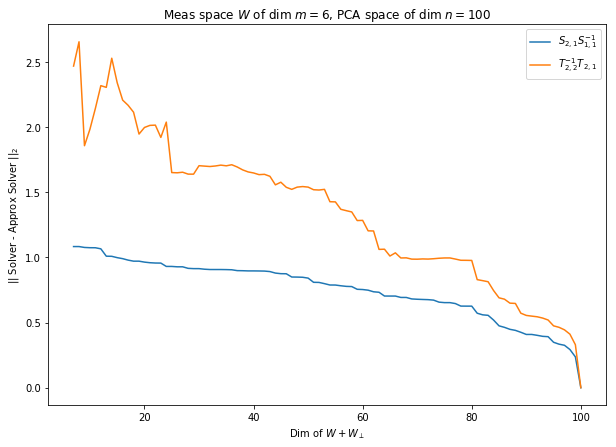

In [350]:
Ssolver_acc = np.zeros(K-m)
Tsolver_acc = np.zeros(K-m)

for M in range(m+1,K):
    
    W2_p = Psi[:,m:M]
    S11_approx = W.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
    S21_approx = W2_p.T @ V @ Sigma_n @ Sigma_n @ V.T @ W
    T22_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W2_p
    T21_approx = W2_p.T @ V @ Sigma_n_inv @ Sigma_n_inv @ V.T @ W

    Ssolver_approx = S21_approx @ np.linalg.pinv(S11_approx)
    Tsolver_approx = np.linalg.pinv(T22_approx) @ T21_approx

    Ssolver_acc[M-(m+1)] = np.linalg.norm(W2_p @ Ssolver_approx - W_p @ Ssolver, ord=2)
    Tsolver_acc[M-(m+1)] = np.linalg.norm(W2_p @ Tsolver_approx - W_p @ Tsolver, ord=2)

plt.figure(figsize=(10, 7))
plt.plot(range(m+1, K+1), Ssolver_acc, label=r'$S_{2,1} S_{1,1}^{-1}$')
plt.plot(range(m+1, K+1), Tsolver_acc, label=r'$T_{2,2}^{-1} T_{2,1}$')
plt.legend(loc=1)
plt.xlabel(r'Dim of $W + W_\perp$')
plt.ylabel(r'$||$ Solver - Approx Solver $||_2$')
plt.title(r'Meas space $W$ of dim $m=${0}, PCA space of dim $n=${1}'.format(m,n))
plt.show()